**1. Tesseract OCR:**
   * Open-source OCR engine with support for various languages, including Chinese.
   * Can be customized with language data and trained on specific datasets.
   * **Pros:** Free, open-source, and highly customizable.
   * **Cons:** Can be slower and less accurate than commercial solutions.

**2. PaddleOCR:**
   * Open-source OCR engine developed by Baidu.
   * Offers high accuracy and speed, especially for Chinese text.
   * Supports various languages and document formats.
   * **Pros:** High accuracy, fast, and supports multiple languages.
   * **Cons:** Can be more complex to install and configure than Tesseract.

**3. EasyOCR:**
   * User-friendly OCR library with support for multiple languages, including Chinese.
   * Provides pre-trained models for various languages.
   * **Pros:** Easy to use, supports multiple languages, and provides pre-trained models.
   * **Cons:** May not be as accurate as other libraries for complex scenarios.

**4. OpenCV:**
   * Versatile computer vision library that includes OCR functionality.
   * Can be used for more advanced OCR tasks, such as text detection and recognition in images.
   * **Pros:** Powerful and flexible, can be used for a wide range of computer vision tasks.
   * **Cons:** Requires more advanced programming skills to use effectively.


# Packages

In [14]:
%pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.72 s (started: 2024-12-19 23:27:15 +00:00)


In [20]:
%matplotlib inline

import os
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

time: 2.36 ms (started: 2024-12-19 23:30:51 +00:00)


## Install chineses font for matplotlib


In [15]:
import requests

# URL of the file you want to download
url = "https://www.freefontdownload.org/download-font/microsoft-jhenghei"
url_zip_filename = "microsoft-jhenghei_freefontdownload_org.zip"

# Send HTTP request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the file to disk
    with open(f"/content/{url_zip_filename}", "wb") as file:
        file.write(response.content)
    print(f"File downloaded and saved as '{url_zip_filename}' in Colab.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded and saved as 'microsoft-jhenghei_freefontdownload_org.zip' in Colab.
time: 3.12 s (started: 2024-12-19 23:27:18 +00:00)


In [16]:
import os
import shutil
import zipfile


def unzip_and_overwrite(zipped_file, dest_dir):
    # 如果目標目錄已經存在，則刪除它
    # if os.path.exists(dest_dir):
    #     shutil.rmtree(dest_dir)

    # 創建目標目錄
    os.makedirs(dest_dir, exist_ok=True)

    # 解壓縮文件
    with zipfile.ZipFile(zipped_file, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)

time: 1.52 ms (started: 2024-12-19 23:27:21 +00:00)


In [17]:
if os.path.exists('microsoft-jhenghei_freefontdownload_org.zip'):
    unzip_and_overwrite(
        zipped_file='microsoft-jhenghei_freefontdownload_org.zip', dest_dir='fonts')

time: 470 ms (started: 2024-12-19 23:27:21 +00:00)


In [18]:
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 確保字體文件存在
font_path = 'fonts/microsoft-jhenghei.ttf'
font_prop = fm.FontProperties(fname=font_path)
print(font_prop)

if not os.path.exists(font_path):
    raise FileNotFoundError(f"Font file not found: {font_path}")

# 手動添加字體
fm.fontManager.addfont(font_path)

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 檢查字體是否正確安裝
font_path = fm.findfont('Microsoft JhengHei')
print(f"Font path: {font_path}")

sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=fonts/microsoft-jhenghei.ttf:size=10.0
Font path: /content/fonts/microsoft-jhenghei.ttf
time: 28.7 ms (started: 2024-12-19 23:27:22 +00:00)


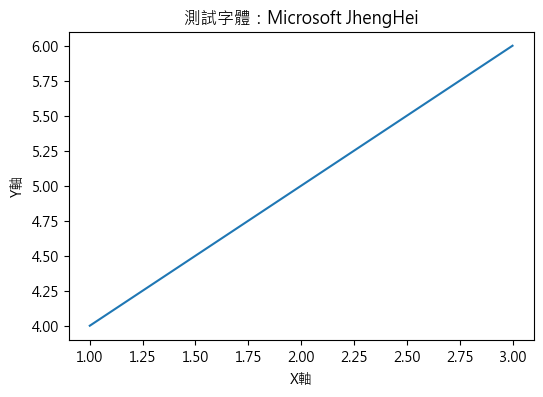

time: 437 ms (started: 2024-12-19 23:27:22 +00:00)


In [19]:
# 測試中文字體
plt.figure(figsize=(6, 4))
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('測試字體：Microsoft JhengHei')
plt.xlabel('X軸')
plt.ylabel('Y軸')
plt.show()

## Prepare images

In [26]:
from io import BytesIO

import requests
from google.colab import files
from PIL import Image

# upload mode is also supported
# uploaded = files.upload()

image_url = 'http://citygod.tw/images/fortune/11.png'
response = requests.get(image_url)
image1 = Image.open(BytesIO(response.content))


image_url2 = 'https://www.lungshan.org.tw/fortune_sticks/images/058.jpg'
response2 = requests.get(image_url2)
image2 = Image.open(BytesIO(response2.content))

time: 771 ms (started: 2024-12-19 23:39:07 +00:00)


In [27]:
image1.save('11.png', format='PNG')  # Save as JPEG, PNG, etc
image2.save('058.jpg', format='PNG')  # Save as JPEG, PNG, etc

time: 1.51 s (started: 2024-12-19 23:39:09 +00:00)


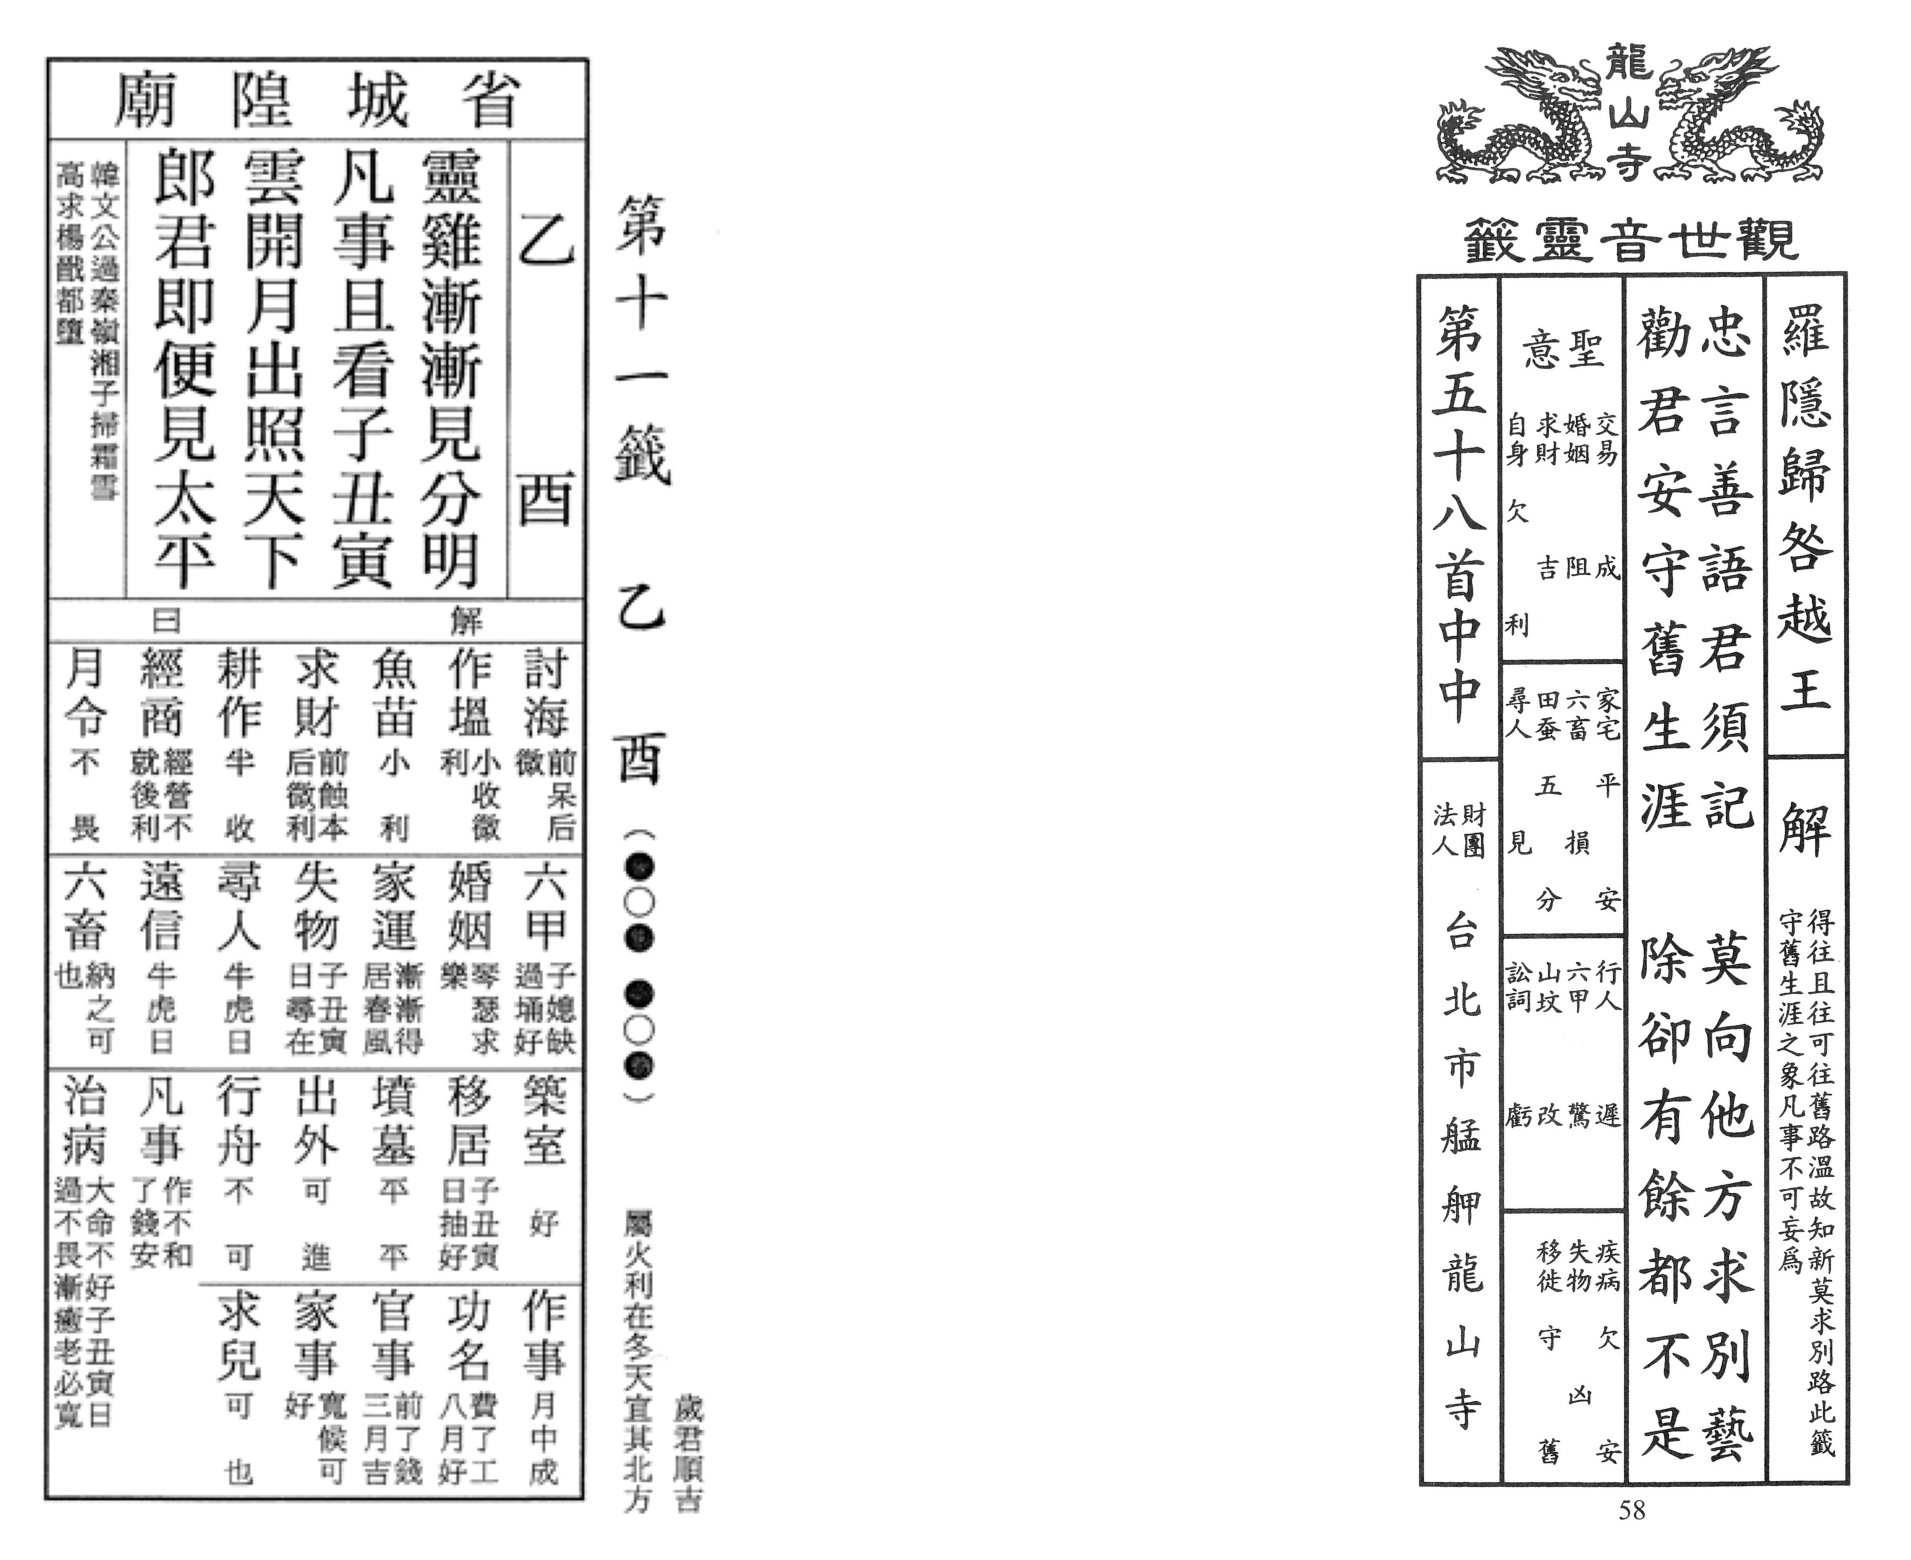

time: 1.62 s (started: 2024-12-20 00:23:46 +00:00)


In [53]:
plt.figure(figsize=(30, 20))
for i, image in zip(range(2), [image1, image2]):
    plt.subplot(1, 2, i+1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

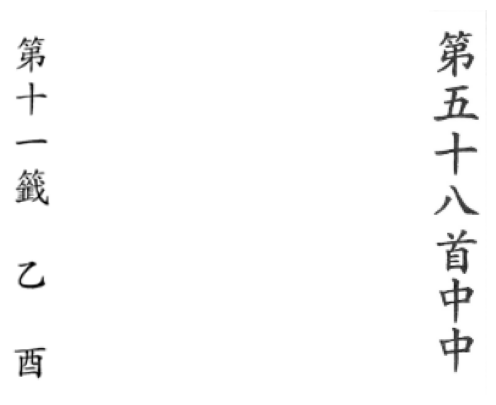

time: 83.5 ms (started: 2024-12-20 00:28:03 +00:00)


In [61]:
image_sub1 = Image.open("11-1.png", mode='r')
image_sub2 = Image.open("058-1.png", mode='r')
# image_sub2 = image_sub2.convert('RGB', colors=255)

plt.figure(figsize=(10, 5))
for i, image in zip(range(2), [image_sub1, image_sub2]):
    plt.subplot(1, 2, i+1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

## Common functions

In [41]:
import textwrap

# Clean and format OCR text


def clean_and_wrap(text, width):
    cleaned_text = ' '.join(text.split())

    # Wrap the text to the specified width
    wrapped_lines = []
    while len(cleaned_text) > width:
        # Find the last space within the width limit
        split_index = cleaned_text.rfind(' ', 0, width)
        if split_index == -1:  # No space found
            split_index = width
        wrapped_lines.append(cleaned_text[:split_index])
        cleaned_text = cleaned_text[split_index:].strip()

    # Add any remaining text
    if cleaned_text:
        wrapped_lines.append(cleaned_text)

    return wrapped_lines


def format_side_by_side(left_text, right_text, left_width=60, right_width=60):
    left_lines = clean_and_wrap(left_text, left_width)
    right_lines = clean_and_wrap(right_text, right_width)

    max_lines = max(len(left_lines), len(right_lines))

    # Extend lists to have equal length
    left_lines += [""] * (max_lines - len(left_lines))
    right_lines += [""] * (max_lines - len(right_lines))

    formatted_text = ""
    for left, right in zip(left_lines, right_lines):
        formatted_text += f"{left:<{left_width}} | {right}\n"

    return formatted_text

time: 1.27 ms (started: 2024-12-20 00:00:41 +00:00)


# Tesseract
- Open-source OCR engine with support for various languages, including Chinese.
- https://github.com/madmaze/pytesseract
- https://github.com/tesseract-ocr/langdata/tree/main/chi_tra

## sudo install tesseract-ocr


In [ ]:
# !sudo apt-get update
!sudo apt-get install -y tesseract-ocr
!sudo apt-get install -y tesseract-ocr-chi-tra # chinese language
%pip install pytesseract Pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,071 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

## pytesseract.image_to_string


In [44]:
import pytesseract
from PIL import Image

# manually assign your Tesseract path（installed in Colab）
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# 繁體中文
language = "chi_tra"

# image_path = list(uploaded.keys())[0]  # choose first file
# image = Image.open(image_path)

# Starrting Tesseract OCR
print(f'Tesseract OCR for 城隍廟', '='*20)
extracted_text1 = pytesseract.image_to_string(image1, lang=language)
print(extracted_text1.strip())

print()
print(f'Tesseract OCR for 龍山寺', '='*20)
extracted_text2 = pytesseract.image_to_string(image2, lang=language)
print(extracted_text2.strip())

Tesseract OCR for 城隍廟 ====================
培佃區也

舉十上 續N。 苛(Coe eeoe》 ga

 

省

廟 隍 城

 

 

N  敬

 

掠齊北比听怎熙
忌志回扯Mr出牛
郊區咆于放k此
銳帳加點中長引

 

 

EE可

 

該呈九殼囊

 

陋弦加打店
引理二說了昌
了舞< 品品英語
人人時
茶是和 姨媽半生中
胞弓遇吉了北盡二和中
苔多k 和了衣誰重呈

 

品誕 計 七志克各

站|品吉PH
險中可思說|戰如玉革

縣珊生 4如十當和
轉玉上 轎陪居昌 匡
由東K 扣除中上扣 用
和

所扣主疆

Tesseract OCR for 龍山寺 ====================
上

WP
2      人苹
2
人

WWW 說8

讓 融只咯邊

/ yi

品
信人和儚哈劑

玫

|各
安
|守
]舊
和生
|產
time: 5.9 s (started: 2024-12-20 00:02:13 +00:00)


In [62]:
import pytesseract
from PIL import Image

# Starrting Tesseract OCR
print(f'Tesseract OCR for 城隍廟', '='*20)
extracted_text1 = pytesseract.image_to_string(image_sub1, lang=language)
print(extracted_text1.strip())

print()
print(f'Tesseract OCR for 龍山寺', '='*20)
extracted_text2 = pytesseract.image_to_string(image_sub2, lang=language)
print(extracted_text2.strip())

Tesseract OCR for 城隍廟 ====================
拒十|匕 人) 抱

Tesseract OCR for 龍山寺 ====================
六崗十有 自全全
time: 656 ms (started: 2024-12-20 00:28:49 +00:00)


# EasyOCR

- EasyOCR is an open-source OCR library that supports Chinese.
- https://github.com/JaidedAI/EasyOCR

## install easyocr

In [8]:
%pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 29.8 MB/s eta 0:00:00


In [9]:
import easyocr

# Initialize the reader for Traditional Chinese and English (if needed)
reader = easyocr.Reader(['ch_tra', 'en'])  # 'ch_tra' is for Traditional Chinese

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

## easyocr.Reader.readtext

In [45]:
result1 = reader.readtext('11.png')
print(f'EasyOCR for 城隍廟', '='*20)
for (bbox, text, prob) in result1:
    print(f'Detected text: {text}, Confidence: {prob}')

result2 = reader.readtext('058.jpg')
print(f'EasyOCR for 龍山寺', '='*20)
for (bbox, text, prob) in result2:
    print(f'Detected text: {text}, Confidence: {prob}')

EasyOCR for 城隍廟 ====================
Detected text: 廟, Confidence: 0.9873234219861757
Detected text: 隍, Confidence: 0.9989857862338027
Detected text: 省, Confidence: 0.9976790321183593
Detected text: 二, Confidence: 0.8599062493914431
Detected text: 8, Confidence: 0.00641423763636656
Detected text: 酉, Confidence: 0.9971909012777225
Detected text: 籤, Confidence: 0.001414980240071806
Detected text: 乙, Confidence: 0.6162551740763753
Detected text: 月#蛩靨雷, Confidence: 9.54840613369203e-07
Detected text: 酉, Confidence: 0.9968126225205118
Detected text: 娼畜, Confidence: 0.004395118513355829
Detected text: 8, Confidence: 0.1932522395157008
Detected text: 蠆, Confidence: 0.0006130367745355164
Detected text: *粲 , Confidence: 0.0006900755652375968
Detected text: 囂雖棄罌鬟詹鑾, Confidence: 1.4215374615005217e-05
Detected text: 麴, Confidence: 0.0022699664026333416
Detected text: 鬚, Confidence: 0.039246957794311976
Detected text: 囂, Confidence: 0.0002330288988410291
Detected text: 囂蠱, Confidence: 0.0001738198

In [63]:
result1 = reader.readtext('11-1.png')
print(f'EasyOCR for 城隍廟', '='*20)
for (bbox, text, prob) in result1:
    print(f'Detected text: {text}, Confidence: {prob}')

result2 = reader.readtext('058-1.png')
print(f'EasyOCR for 龍山寺', '='*20)
for (bbox, text, prob) in result2:
    print(f'Detected text: {text}, Confidence: {prob}')

EasyOCR for 城隍廟 ====================
Detected text: #, Confidence: 0.016998704703055978
Detected text: 乙, Confidence: 0.9881070142764656
Detected text: 酉, Confidence: 0.9978072755648668
EasyOCR for 龍山寺 ====================
Detected text: , Confidence: 0.0
time: 6.32 s (started: 2024-12-20 00:29:24 +00:00)


# PaddleOCR

Open-source OCR engine developed by Baidu

## install paddlepaddle paddleocr opencv

In [11]:
%pip install paddlepaddle paddleocr matplotlib opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=dfbd01186f22bfa7ef53e7c942c15fb5a92c16d88cd19d2e1a7d10be10e52c6f
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: opt-einsum
    Fou

In [12]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from paddleocr import PaddleOCR, draw_ocr

## PaddleOCR.ocr

In [46]:
ocr = PaddleOCR(use_angle_cls=True, lang='chinese_cht')

result1 = ocr.ocr('11.png', cls=True)
for line in result1[0]:
    print(line)

result2 = ocr.ocr('058.jpg', cls=True)
for line in result1[0]:
    print(line)

[2024/12/20 00:07:08] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/chinese_cht/chinese_cht_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

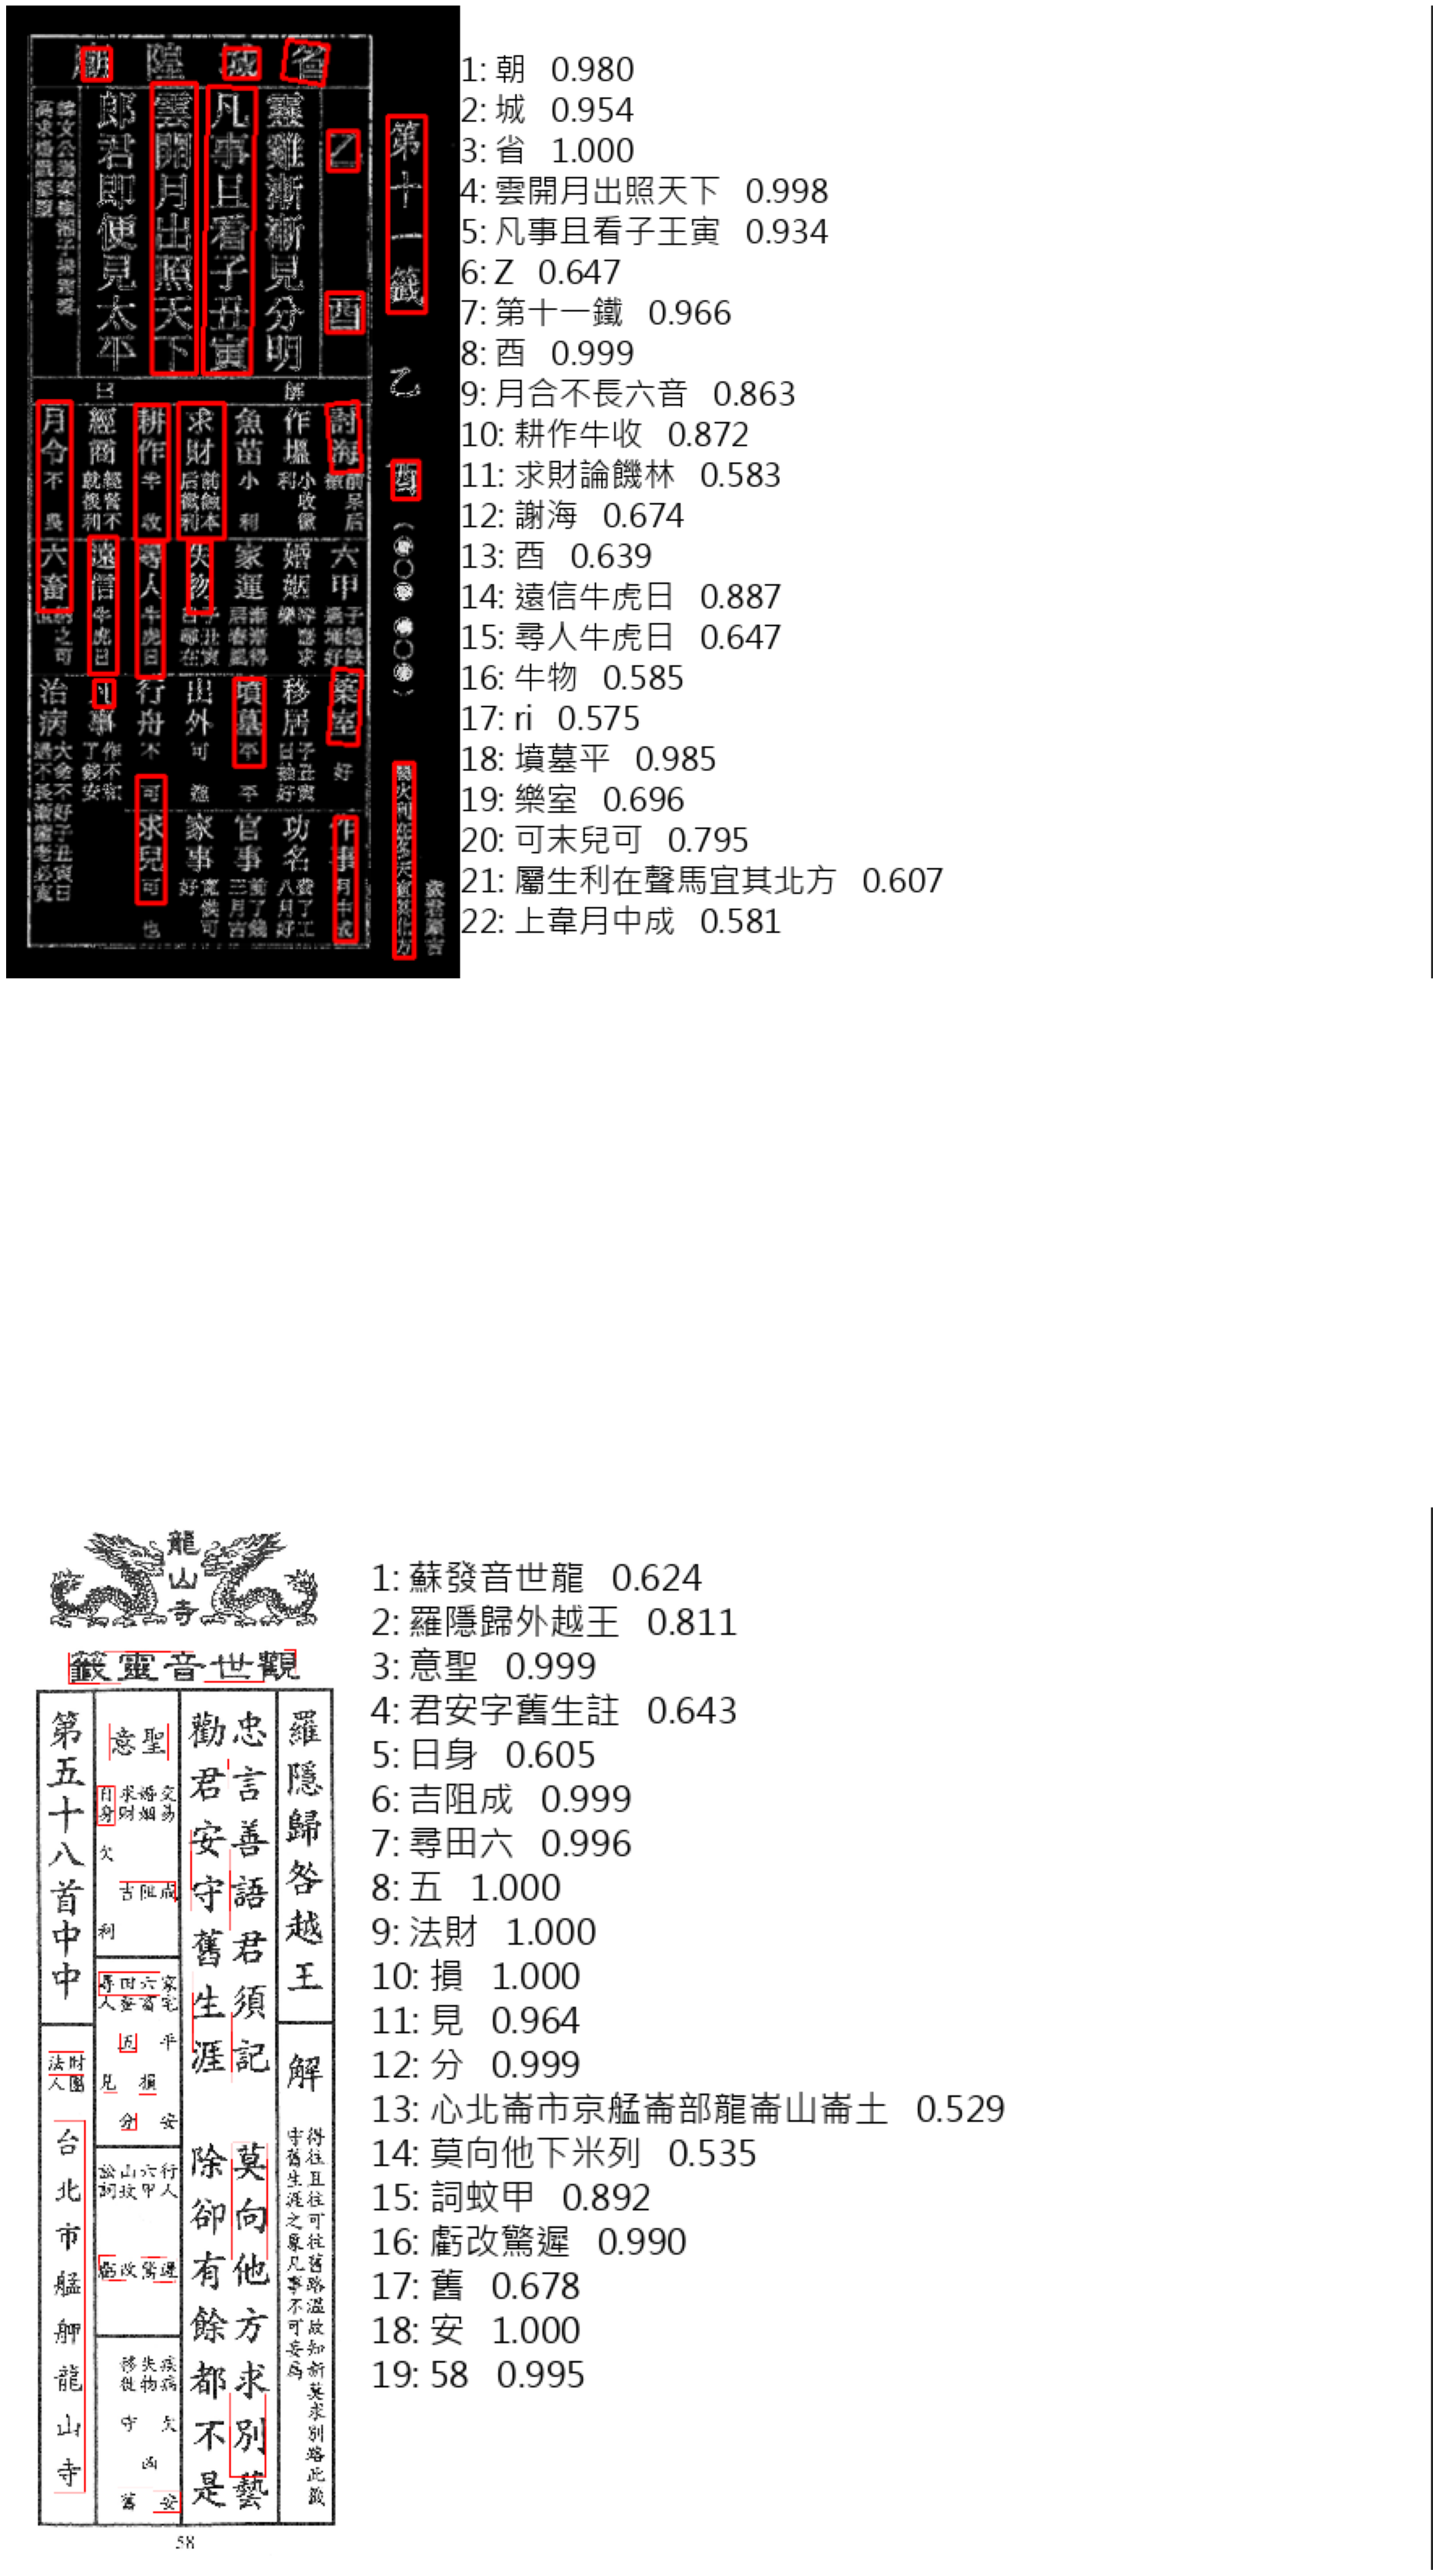

time: 2.87 s (started: 2024-12-20 00:14:35 +00:00)


In [51]:
plt.figure(figsize=(30, 60))
for i, result, image in zip(range(2), [result1, result2], [image1, image2]):
    plt.subplot(2, 1, i+1)

    boxes = [line[0] for line in result[0]]
    txts = [line[1][0] for line in result[0]]
    scores = [line[1][1] for line in result[0]]

    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    annotated_image = draw_ocr(image_cv, boxes, txts, scores, font_path='fonts/microsoft-jhenghei.ttf')

    plt.imshow(annotated_image)
    plt.axis('off')

plt.show()

In [64]:
result_sub1 = ocr.ocr('11-1.png', cls=True)
for line in result_sub1[0]:
    print(line)

result_sub2 = ocr.ocr('058-1.png', cls=True)
for line in result_sub1[0]:
    print(line)

[2024/12/20 00:30:49] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.048331260681152344
[2024/12/20 00:30:49] ppocr DEBUG: cls num  : 4, elapsed : 0.030476808547973633
[2024/12/20 00:30:49] ppocr DEBUG: rec_res num  : 4, elapsed : 0.16150331497192383
[[[8.0, 25.0], [28.0, 25.0], [28.0, 53.0], [8.0, 53.0]], ('第', 0.9997361302375793)]
[[[7.0, 283.0], [29.0, 283.0], [29.0, 307.0], [7.0, 307.0]], ('酉', 0.5372056365013123)]
[2024/12/20 00:30:49] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.06629347801208496
[2024/12/20 00:30:49] ppocr DEBUG: cls num  : 3, elapsed : 0.03244900703430176
[2024/12/20 00:30:49] ppocr DEBUG: rec_res num  : 3, elapsed : 0.10497593879699707
[[[8.0, 25.0], [28.0, 25.0], [28.0, 53.0], [8.0, 53.0]], ('第', 0.9997361302375793)]
[[[7.0, 283.0], [29.0, 283.0], [29.0, 307.0], [7.0, 307.0]], ('酉', 0.5372056365013123)]
time: 475 ms (started: 2024-12-20 00:30:49 +00:00)


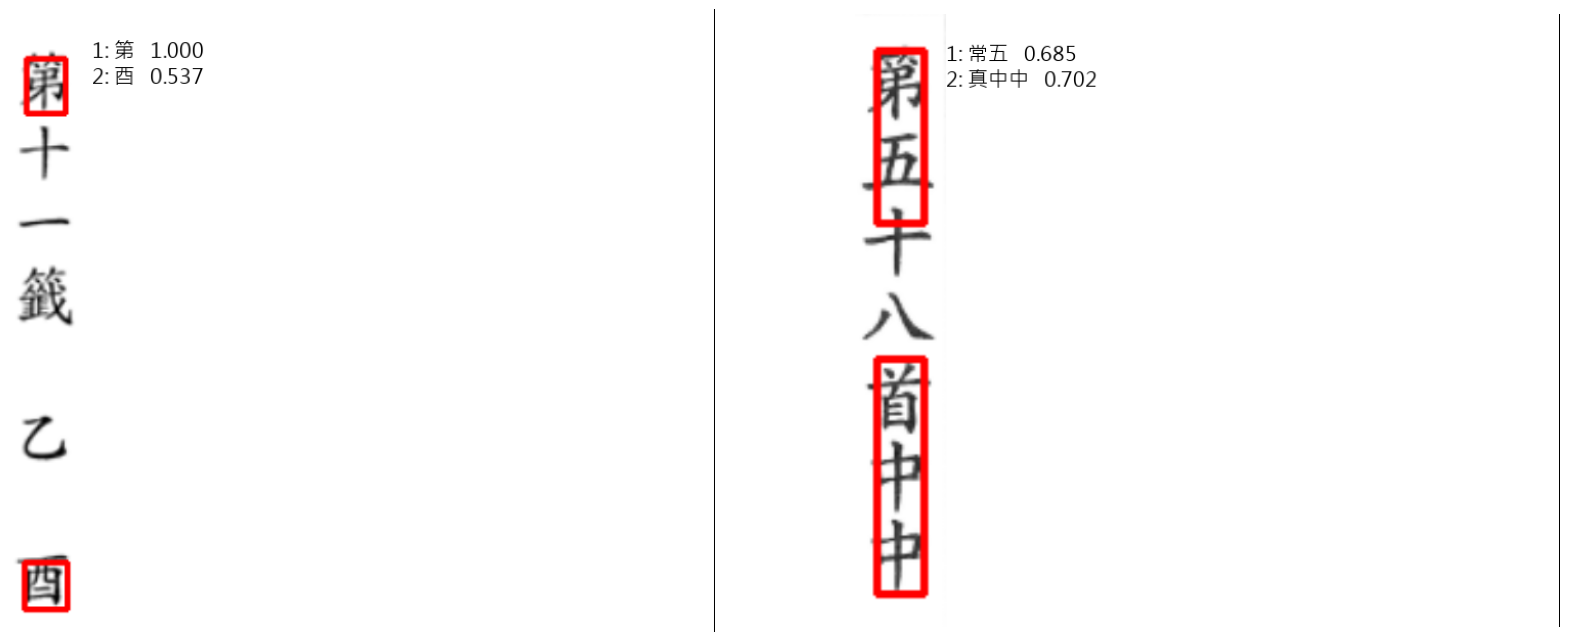

time: 365 ms (started: 2024-12-20 00:31:54 +00:00)


In [67]:
plt.figure(figsize=(20, 10))
for i, result, image in zip(range(2), [result_sub1, result_sub2], [image_sub1, image_sub2]):
    plt.subplot(1, 2, i+1)

    boxes = [line[0] for line in result[0]]
    txts = [line[1][0] for line in result[0]]
    scores = [line[1][1] for line in result[0]]

    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
    annotated_image = draw_ocr(image_cv, boxes, txts, scores, font_path='fonts/microsoft-jhenghei.ttf')

    plt.imshow(annotated_image)
    plt.axis('off')

plt.show()